In [1]:
#pip install imblearn 

In [2]:
#pip install xgboost 

In [3]:
# installing required packages and libraries 
import numpy as np 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# importing the training and testing csv file 
# skimming through the dataset missing values were represented as NA, n/a and blank spaces
na_value = ['NA', 'n/a', ' ']
training_data = pd.read_csv('Training Data.csv', na_values = na_value, keep_default_na = True)
testing_data = pd.read_csv('Test data.csv', na_values = na_value, keep_default_na = True)

# keeping an orginal copy of both datasets just in case anything goes wrong 
ind_train_data = training_data.copy()
ind_test_data = testing_data.copy()

In [5]:
training_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# Pre-Processing Data

GeeksforGeeks (2017). ML | Data Preprocessing in Python. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/machine-learning/data-preprocessing-machine-learning-python/.

Pykes , K. (2025). Data Preprocessing: A Complete Guide with Python Examples. Available at: https://www.datacamp.com/blog/data-preprocessing.

In [6]:
# checking the general information of the training and testing data 
# loan status is the target variable 
training_data.info()
print()
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
# dropping uneededed columns 
training_data.drop(columns = ['Loan ID', 'Customer ID'], inplace = True) # removing the two columns and replacing the original dataset with this one 
                                                                        # still have copies for reassurance 
# doing the same for testing data 
testing_data.drop(columns = ['Loan ID', 'Customer ID'], inplace = True)

In [8]:
# checking for missing values in both training and testing 
print('Missing values in training data:')
print(training_data.isnull().sum())
print()
print('Missing values in test data:')
print(testing_data.isnull().sum())

Missing values in training data:
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

Missing values in test data:
Current Loan Amount              353
Term                             353
Credit Score                    2334
Annual Income                   2334
Years in current job             780
Home Ownership                   353
Purpose                          353
Monthly Debt       

In [9]:
missing_val_count = training_data.isnull().sum()
num_of_rows = len(training_data)
percentage_missing = (missing_val_count/num_of_rows) * 100
print('Percentage missing = ', percentage_missing)

Percentage missing =  Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64


In [10]:
# doing the same for testing 
missing_test_count = testing_data.isnull().sum()
num_of_testrows = len(testing_data)
percentage_missing = (missing_test_count/num_of_testrows) * 100
print('Percentage missing = ', percentage_missing)

Percentage missing =  Current Loan Amount              3.409640
Term                             3.409640
Credit Score                    22.544190
Annual Income                   22.544190
Years in current job             7.534048
Home Ownership                   3.409640
Purpose                          3.409640
Monthly Debt                     3.409640
Years of Credit History          3.409640
Months since last delinquent    54.660485
Number of Open Accounts          3.409640
Number of Credit Problems        3.409640
Current Credit Balance           3.409640
Maximum Open Credit              3.409640
Bankruptcies                     3.622139
Tax Liens                        3.419299
dtype: float64


The output for the sum of missing values shows that all columns have missing values however none having more the 75% so no columns need to be dropped. Measures in place for all columns

Bobbitt, Z. (2022). Pandas: How to Fill NaN Values with Median (3 Examples). [online] Statology. Available at: https://www.statology.org/pandas-fillna-with-median/.

Pandas Documentation (n.d.). pandas.DataFrame.dropna — pandas 1.0.3 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html.

In [11]:
# handling missing data 
num_col = training_data.select_dtypes(include=['float64', 'int64']).columns
cat_col = training_data.select_dtypes(include=['object']).columns

# remove target column from categorical list 
if 'Loan Status' in cat_col:
    cat_col = cat_col.drop('Loan Status')

# also removing months since last delinquent 
if 'Months since last delinquent' in num_col:
    num_col = num_col.drop('Months since last delinquent')

#-------------------------------------------------------------------------------------------------------------------------------------------------------
# for loan status in training data 
training_data = training_data.dropna(subset = ['Loan Status'])

# replacing missing values for numeric columns with medium rather than mean to prevent the data from being skewed to either extreme 
for col in num_col:
    median_value = training_data[col].median()
    training_data[col].fillna(median_value, inplace=True)
    if col in testing_data.columns: # doing the same for the testing data 
        testing_data[col].fillna(median_value, inplace=True)

# for months since last delinquent it will be filled with the sentinel value of -1 as some customers may not have ever had their account in the arrears 
training_data['Months since last delinquent'].fillna(-1, inplace = True)
testing_data['Months since last delinquent'].fillna(-1, inplace = True)

# replacing missing values for categorical columns with mode 
for col in cat_col:
    mode_value = training_data[col].mode()[0] # ensures only one usable mode is used 
    training_data[col].fillna(mode_value, inplace=True)
    if col in testing_data.columns:
        testing_data[col].fillna(mode_value, inplace=True)

In [12]:
# re-checking for the presence of null values in both datasets 
print('Missing values in training data (RECHECK):')
print(training_data.isnull().sum())
print()
print('Missing values in test data (RECHECK):')
print(testing_data.isnull().sum())

Missing values in training data (RECHECK):
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

Missing values in test data (RECHECK):
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last de

As shown above all missing values have been successfully removed. Now to check for the presence of duplicated values 

Bobbitt, Z. (2020). How to Drop Duplicate Rows in a Pandas DataFrame. [online] Statology. Available at: https://www.statology.org/pandas-drop-duplicates/.

Pandas Documentation (n.d.). pandas.DataFrame.drop_duplicates — pandas 1.2.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html.

In [13]:
# checking for exact duplicates 
training_data.duplicated()
# checking the duplicate count in the dataframe
train_duplicates = (training_data.duplicated()).sum()
print(train_duplicates) 
print()
testing_data.duplicated()
test_duplicates = (testing_data.duplicated()).sum()
print(test_duplicates)

10215

352


In [14]:
#removing duplicates from the training dataset to prevent over-representing certain groups which could lead to bias in ml models
training_data.drop_duplicates(inplace = True ) # replacing the training dataset with the one with no duplicates 
# checking duplicated rows are removed 
train_duplicated_check = training_data.duplicated().sum()
print(train_duplicated_check) 

#removing from test to ensure metrics only evaluate unique enteries in the data 
testing_data.drop_duplicates(inplace = True)
test_duplicated_check = testing_data.duplicated().sum()
print(test_duplicated_check)

0
0


GeeksforGeeks (2021). Pandas Strip whitespace from Entire DataFrame. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/pandas/pandas-strip-whitespace-from-entire-dataframe/.

Python, R. (2019). How to Use Python Lambda Functions – Real Python. [online] realpython.com. Available at: https://realpython.com/python-lambda/.

W3Schools (2019). Python Lambda. [online] W3schools.com. Available at: https://www.w3schools.com/python/python_lambda.asp.

In [15]:
#removing whitespace from the categorical columns 
# remove whitespace from the variables if there type is object if not leave as it is -> will only apply to categorical variables and not numerical ones 
training_data = training_data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
testing_data = testing_data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [16]:
# creating another copy
no_nan_duplicate_train= training_data.copy()
no_nan_duplicate_test= testing_data.copy()

In [17]:
# encoding variables in both datasets 
#1 = fully paid, 0= charged off
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
le = LabelEncoder()
training_data['Loan Status'] = le.fit_transform(training_data['Loan Status'])

enc = OneHotEncoder(sparse_output = False, drop = 'first') #outputs normal array instead of a sparse matrix 
cat_encoding = enc.fit_transform(training_data[cat_col])
test_cat_encoding = enc.transform(testing_data[cat_col])
cat_enc_df = pd.DataFrame(cat_encoding, columns=enc.get_feature_names_out(cat_col)) #the now encoded categorical columns are presented as a dataframe
cat_test_enc_df = pd.DataFrame(test_cat_encoding, columns=enc.get_feature_names_out(cat_col))

# combining the encoded categorical and numerical columns together in one dataframe
train_dataset_enc = training_data.drop(columns=cat_col) #needed to drop the existing categorical columns, allows cleaner dataframe 
test_dataset_enc = testing_data.drop(columns=cat_col)
encoded_train_dataset = pd.concat([train_dataset_enc.reset_index(drop = True), cat_enc_df], axis = 1)
encoded_test_dataset = pd.concat([test_dataset_enc.reset_index(drop = True), cat_test_enc_df], axis = 1)

In [18]:
# make sure both dataframes have same columns
encoded_test_dataset = encoded_test_dataset[X.columns] if 'X' in locals() else encoded_test_dataset

In [19]:
print('Missing values in encoded training data:')
print(encoded_train_dataset.isnull().sum())
print()
print('Missing values in encoded test data:')
print(encoded_test_dataset.isnull().sum())

Missing values in encoded training data:
Loan Status                       0
Current Loan Amount               0
Credit Score                      0
Annual Income                     0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
Term_Short Term                   0
Years in current job_10+ years    0
Years in current job_2 years      0
Years in current job_3 years      0
Years in current job_4 years      0
Years in current job_5 years      0
Years in current job_6 years      0
Years in current job_7 years      0
Years in current job_8 years      0
Years in current job_9 years      0
Years in current job_< 1 year     0
Home Ownership_Home Mortgage      0
Home Ownership_Own Home           0
Home Ownership_Rent    

In [20]:
# splitting features and target 
X = encoded_train_dataset.drop("Loan Status", axis=1)
y = encoded_train_dataset["Loan Status"]

In [21]:
# standardising data
# in this dataset the outliers are useful and min and max values can provide useful information about the factors that determine loan status 
    # so will be using standard scaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#test_scaled = scaler.transform(encoded_test_dataset)

# Visualisations 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

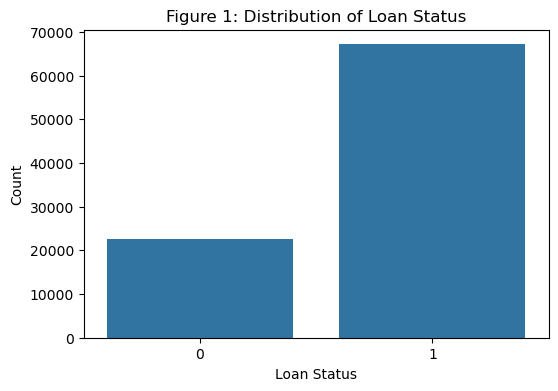

In [23]:
#class balance between "fully paid" and "charged off"
#1 = fully paid, 0= charged off
plt.figure(figsize=(6,4))
sns.countplot(x='Loan Status', data=training_data)
plt.title("Figure 1: Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

- class imbalance
- more loans are "fully paid" than "charged off"
- this imbalance can make the model biased

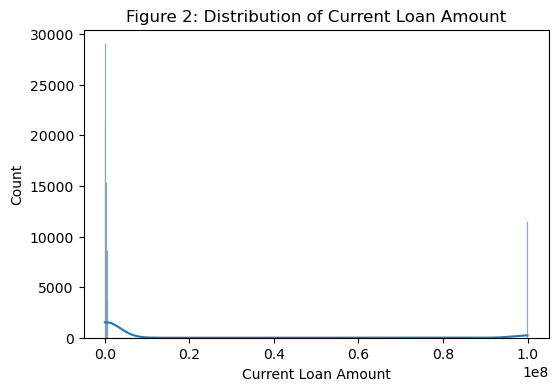

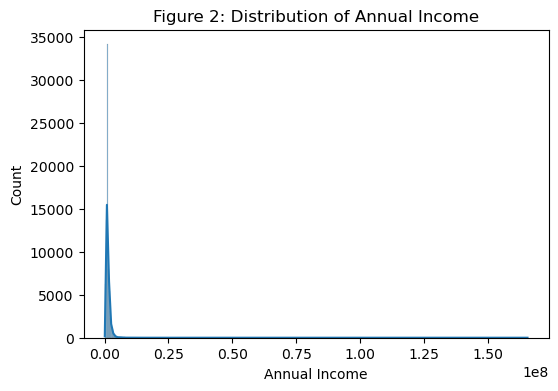

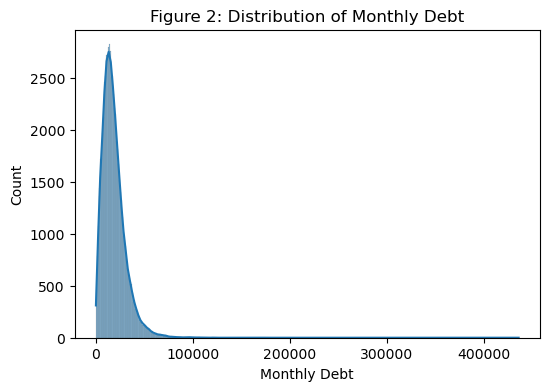

In [24]:
#visualising the spread loan amount, annual income, monthly debt

num_cols = ['Current Loan Amount', 'Annual Income', 'Monthly Debt']
#plt.suptitle('Figure 2: Spread of Current Loan Amount, Annual Income, Monthly Debt')

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(training_data[col], kde=True)
    plt.title(f"Figure 2: Distribution of {col}")
    #plt.tight_layout()
    plt.show()

 Current Loan Amount:
- right-skewed distribution 
- most have a low loan amount 
- sharp peak at a specific loan amount. indicating a common loan cap
- this may affect the models performance if not looked into.
- there might be a possibility of outliers


Annual Income:
- only a few have very high incomes
- most individuals earn low incomes
- this graph highlights income inequality. suggeating the income may need to be scaled to reduce skewness befpre modeling


Monthly Debt:
- similar to income, monthly debt is right-skewed.
- most people have low monthly debt, but some have extremely high values
- skewed distribution can affect the models training

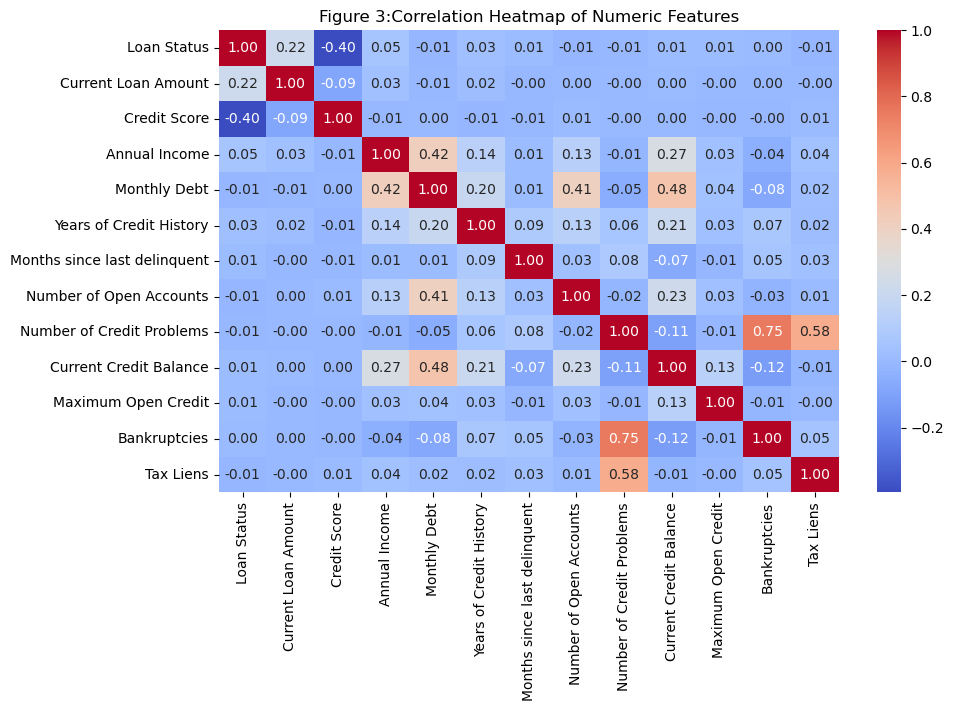

Loan Status                     1.000000
Current Loan Amount             0.222108
Annual Income                   0.051677
Years of Credit History         0.029460
Maximum Open Credit             0.009573
Current Credit Balance          0.009542
Months since last delinquent    0.008938
Bankruptcies                    0.003466
Number of Credit Problems      -0.006597
Monthly Debt                   -0.012127
Tax Liens                      -0.012718
Number of Open Accounts        -0.013467
Credit Score                   -0.395473
Name: Loan Status, dtype: float64


In [25]:
#relationship between loan amount, annual income, monthly debt

plt.figure(figsize=(10,6))
corr = training_data.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Figure 3:Correlation Heatmap of Numeric Features")
plt.show()

print(corr['Loan Status'].sort_values(ascending = False))

Strong positive correlations:
- Bankruptcies and Number of Credit Problems 
- Tax Liens and Number of Credit Problems 
- Monthly Debt and Current Credit Balance 
- Monthly Debt and Number of Open Accounts 
- Annual Income and Monthly Debt 


Strong negative correlations: 
- Credit Score and Loan Status 

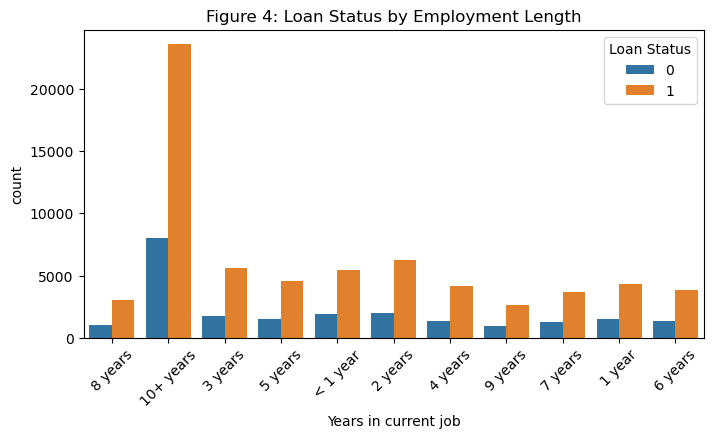

In [26]:
#showing the loan status by years
plt.figure(figsize=(8,4))
sns.countplot(x='Years in current job', hue='Loan Status', data=training_data)
plt.title("Figure 4: Loan Status by Employment Length")
plt.xticks(rotation=45)
plt.show()

- those with longer employments, generally 10+ years, tend to have more loans and higher rate of repayment
- the employment lengths can be a predivtive feature

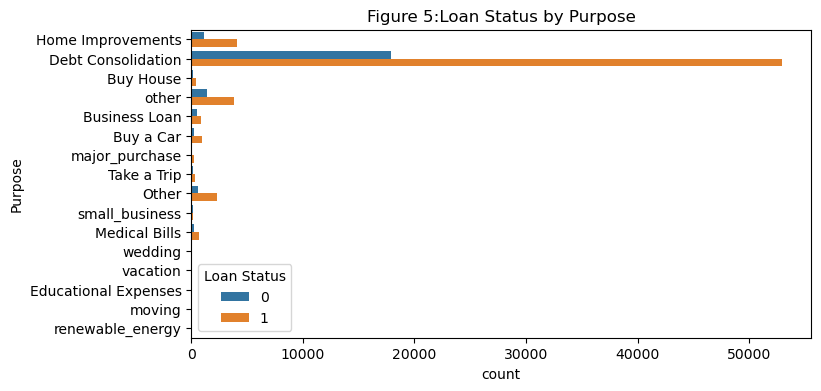

In [27]:
#how successful loans are repayed by Purpose 
plt.figure(figsize=(8,4))
sns.countplot(y='Purpose', hue='Loan Status', data=training_data)
plt.title("Figure 5:Loan Status by Purpose")
plt.show()

- certain purposes (debt consolidation, home improvements) have higher counts and different success rates

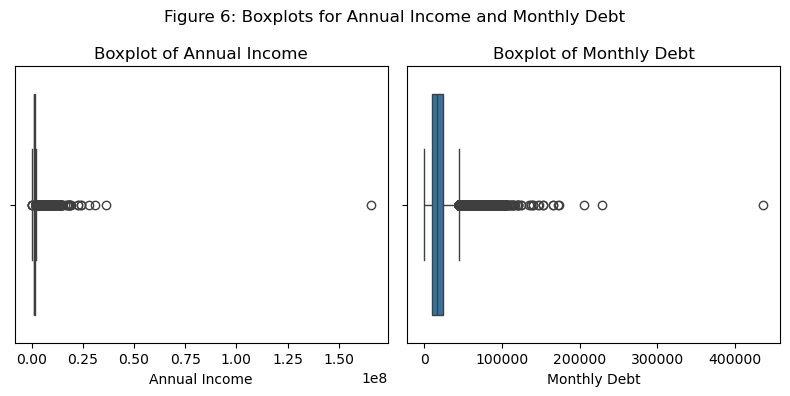

In [28]:
fig, axes = plt.subplots(1, 2,  figsize = (8,4))
                         
# Boxplot for Annual Income
sns.boxplot(x=training_data['Annual Income'], ax = axes[0])
axes[0].set_title("Boxplot of Annual Income")
axes[0].set_xlabel("Annual Income")

# Boxplot for Monthly Debt
sns.boxplot(x=training_data['Monthly Debt'], ax = axes[1])
axes[1].set_title("Boxplot of Monthly Debt")
axes[1].set_xlabel("Monthly Debt")

fig.suptitle('Figure 6: Boxplots for Annual Income and Monthly Debt')
plt.tight_layout()
plt.show()

- most people earn relatively low incomes
- there are some extreme outliers- showing a few individuals earn a lot more
- distribution is right-skewed, menaing most of the data is on the lower end
- outliers can disort the model 

# Model Building 

In [29]:
# getting the counts of the target variable: Loan Status 
#1 = fully paid, 0= charged off
y.value_counts()

Loan Status
1    67146
0    22639
Name: count, dtype: int64

Siddiqi, F. (2024). How can I determine if my data is balanced or imbalanced? [online] Medium. Available at: https://medium.com/@faheemsiddiqi789/how-can-i-determine-if-my-data-is-balanced-or-imbalanced-080819af408c.

More fully paid loans compared to charged off loans. Working out the percentage Charged Off is the minority class that takes up 25.2% of the whole training dataset whereas the majority class, Fully Paid, takes 74.8% of the training dataset. This tells us that the dataset is imbalanced.

-------------------------------------------------------------------------------------------------------------------------------------------------------
GeeksforGeeks (2021a). How to split a Dataset into Train and Test Sets using Python. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/machine-learning/how-to-split-a-dataset-into-train-and-test-sets-using-python/.

ImbalancedLearn (n.d.). SMOTE — Version 0.9.0. [online] imbalanced-learn.org. Available at: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html.

Kurui, M. (2025). Mastering Imbalanced Data: SMOTE Explained with Scikit-learn - codepointtech.com. [online] codepointtech.com. Available at: https://codepointtech.com/mastering-imbalanced-data-smote-explained-with-scikit-learn/.

SATPATHY, S. (2020). SMOTE - A Common Technique to Overcome Class Imbalance Problem. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/.

scikit-learn (2018). sklearn.model_selection.train_test_split — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

In [30]:
# splitting the training set into training and validation 
# will combine into the full training set before applying to testing data 

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 42, shuffle = True, stratify = y)
# random state fixes the shuffling applied to the data for a reproducible output 
#shuffle ensures datapoints are randomly assigned to train/test sets
#stratify splits data so random split contains the same proportion of the y variable as the original dataset

In [31]:
# applying SMOTE to balance the training data 
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy = 'minority', random_state = 42)

x_train_resample, y_train_resampled = smote.fit_resample(x_train, y_train)
print('Before SMOTE y_train counts:', y_train.value_counts())
print('After SMOTE y_train_resampled counts:', y_train_resampled.value_counts())

Before SMOTE y_train counts: Loan Status
1    53717
0    18111
Name: count, dtype: int64
After SMOTE y_train_resampled counts: Loan Status
0    53717
1    53717
Name: count, dtype: int64


The data is now balanced

In [32]:
from imblearn.pipeline import Pipeline 
# creating a pipeline for easier smote application since there will be multiple models 
# prevents from having to redefine each time 

## Logistic Regression 

GeeksforGeeks (2020). Stratified K Fold Cross Validation. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/machine-learning/stratified-k-fold-cross-validation/.

In [33]:
from sklearn.linear_model import LogisticRegression 
from scipy.stats import uniform, loguniform 

# making the pipeline 
lr_pipeline = Pipeline(steps = [('scaler', StandardScaler()), ('smote', smote), ('estimator', LogisticRegression(random_state = 42))])


#creating a param grid for hyperparameters 
lr_param_grid = {
    'estimator__penalty' : ['l1','l2','elasticnet', 'none'],
    'estimator__C' : loguniform(1e-3, 1e3),
    'estimator__solver' : ['liblinear', 'saga'],
    'estimator__class_weight': [None, 'balanced'],
    'estimator__max_iter': [100,500,1000,2500],
    'estimator__l1_ratio': uniform(0,1)} # used for elasticnet penalty and it describes the ratio between l1 and l2

skfold = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
tuner_lr = RandomizedSearchCV(lr_pipeline, param_distributions= lr_param_grid, cv=skfold, scoring = 'f1', verbose=2, n_jobs=-1 ) # f1 score is better than accuracy for imbalanced datasets

best_tuner_lr = tuner_lr.fit(x_train, y_train) 
final_lr = best_tuner_lr.best_estimator_

y_lr_pred = best_tuner_lr.predict(x_val)

from sklearn.metrics import accuracy_score 
print('Accuracy score of Logistic Regression:', accuracy_score(y_val,y_lr_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy score of Logistic Regression: 0.6871415047056858


In [34]:
from sklearn.metrics import classification_report
print('Figure 7: Logisitc Regression Classification Report:', classification_report(y_val, y_lr_pred))

Figure 7: Logisitc Regression Classification Report:               precision    recall  f1-score   support

           0       0.42      0.63      0.50      4528
           1       0.85      0.71      0.77     13429

    accuracy                           0.69     17957
   macro avg       0.63      0.67      0.64     17957
weighted avg       0.74      0.69      0.70     17957



In [35]:
# re-combine the split training data so that the testing data sees the entirety of the training dataset to provide full performance 

final_lr.fit(X, y)
lr_smote_predict = final_lr.predict(encoded_test_dataset)

In [36]:
# making a copy of the test dataset which will include the added columns of predictions from the models 
test_predictions_df = testing_data.copy()
test_predictions_df['Logistic Regression'] = lr_smote_predict
test_predictions_df.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Logistic Regression
0,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,-1.0,9.0,0.0,621908.0,1058970.0,0.0,0.0,1
1,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,-1.0,11.0,0.0,679573.0,904442.0,0.0,0.0,1
2,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,1
3,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,0
4,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,1


## Random Forest 

GeeksforGeeks (2020a). Random Forest Classifier using Scikitlearn. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/dsa/random-forest-classifier-using-scikit-learn/.

GeeksforGeeks (2022). Random Forest Hyperparameter Tuning in Python. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/machine-learning/random-forest-hyperparameter-tuning-in-python/.

Scikit-Learn (2025). sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 Documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

Shafi, A. (2023). Sklearn Random Forest Classifiers in Python Tutorial. [online] www.datacamp.com. Available at: https://www.datacamp.com/tutorial/random-forests-classifier-python.

In [37]:
from sklearn.ensemble import RandomForestClassifier

# pipeline for random forest 
rf_pipeline = Pipeline(steps = [('scaler', StandardScaler()), ('smote', smote), ('estimator', RandomForestClassifier(random_state = 42))])

# param grid 
rf_param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 5],
    'estimator__max_features': ['sqrt', 'log2', None],
    'estimator__bootstrap': [True, False],
    'estimator__class_weight': [None, 'balanced']}

#skfold = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
tuner_rf = RandomizedSearchCV(rf_pipeline, param_distributions= rf_param_grid, cv=skfold, scoring = 'f1', verbose=2, n_jobs=-1 ) 

best_tuner_rf = tuner_rf.fit(x_train, y_train) 
final_rf = best_tuner_rf.best_estimator_

y_rf_pred = best_tuner_rf.predict(x_val)

from sklearn.metrics import accuracy_score 
print('Accuracy score of Random Forest Classification:', accuracy_score(y_val,y_rf_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy score of Random Forest Classification: 0.7432199142395723


In [38]:
print('Figure 8: Random Forest Classification Report', classification_report(y_val, y_rf_pred))

Figure 8: Random Forest Classification Report               precision    recall  f1-score   support

           0       0.49      0.46      0.48      4528
           1       0.82      0.84      0.83     13429

    accuracy                           0.74     17957
   macro avg       0.66      0.65      0.65     17957
weighted avg       0.74      0.74      0.74     17957



In [39]:
final_rf.fit(X, y)
rf_smote_predict = final_rf.predict(encoded_test_dataset)

In [40]:
test_predictions_df['Random Forest Classification'] = rf_smote_predict
#test_predictions_df.head()

## XGBOOST 

Brownlee, J. (2020). How to Configure XGBoost for Imbalanced Classification. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/.

GeeksforGeeks (2019). Implementation of XGBoost (eXtreme Gradient Boosting). [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/machine-learning/implementation-of-xgboost-extreme-gradient-boosting/.

Numpy (n.d.). numpy.bincount — NumPy v1.24 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/generated/numpy.bincount.html.

RITHP (2023). Optimizing XGBoost: A Guide to Hyperparameter Tuning. [online] Medium. Available at: https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d.

XGBOOST Documentation (2016). Python API Reference — xgboost 0.90 documentation. [online] Readthedocs.io. Available at: https://federated-xgboost.readthedocs.io/en/latest/python/python_api.html.

In [41]:
import xgboost as xgb

# pipeline for xgboost
xgb_pipeline = Pipeline(steps = [('scaler', StandardScaler()), ('smote', smote), ('estimator', xgb.XGBClassifier(random_state = 42))])

# for scale_pos_weight parameter, which is used to scale the gradient for the positive class 
neg, pos = np.bincount(y_train) # counts the values of 0s and 1s in the training data 
scale_pos_weight = neg/pos


# param grid 
xgb_param_grid = {
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': uniform(0.1, 0.3),
    'estimator__n_estimators': [100, 200, 300],
    'estimator__subsample': [0.5, 0.7, 1],
    'estimator__scale_pos_weight': [scale_pos_weight]}

tuner_xgb = RandomizedSearchCV(xgb_pipeline, param_distributions= xgb_param_grid, cv=skfold, scoring = 'f1', verbose=2, n_jobs=-1 ) 

best_tuner_xgb = tuner_xgb.fit(x_train, y_train) 
final_xgb = best_tuner_xgb.best_estimator_

y_xgb_pred = best_tuner_xgb.predict(x_val)

from sklearn.metrics import accuracy_score 
print('Accuracy score of XGBoost:', accuracy_score(y_val,y_xgb_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy score of XGBoost: 0.6528930222197472


In [42]:
print('Figure 9: XGBOOST Classification Report', classification_report(y_val, y_xgb_pred))

Figure 9: XGBOOST Classification Report               precision    recall  f1-score   support

           0       0.39      0.68      0.50      4528
           1       0.86      0.64      0.73     13429

    accuracy                           0.65     17957
   macro avg       0.62      0.66      0.62     17957
weighted avg       0.74      0.65      0.68     17957



In [43]:
final_xgb.fit(X, y)
xgb_smote_predict = final_xgb.predict(encoded_test_dataset)

In [44]:
test_predictions_df['XGBoost'] = xgb_smote_predict
test_predictions_df.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Logistic Regression,Random Forest Classification,XGBoost
0,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,-1.0,9.0,0.0,621908.0,1058970.0,0.0,0.0,1,1,1
1,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,-1.0,11.0,0.0,679573.0,904442.0,0.0,0.0,1,1,1
2,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,1,1,1
3,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,0,0,0
4,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,1,1,1


## Ensemble

Bhuva, L. (2025). Understanding Voting Classifiers in Machine Learning: A Comprehensive Guide🌟🚀. [online] Medium. Available at: https://medium.com/@lomashbhuva/understanding-voting-classifiers-in-machine-learning-a-comprehensive-guide-6589b5f17e0f.

GeeksforGeeks (2019b). Voting Classifier using Sklearn ML. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/machine-learning/ml-voting-classifier-using-sklearn/.

scikit-learn (n.d.). sklearn.ensemble.VotingClassifier — scikit-learn 0.24.0 Documentation. [online] scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html.

In [52]:
from sklearn.ensemble import VotingClassifier 
model_ensemble = VotingClassifier(
    estimators = [('lr', best_tuner_lr), 
                  ('rf', best_tuner_rf), 
                  ('xgb', best_tuner_xgb)], 
                  voting = 'soft')

model_ensemble.fit(x_train, y_train)
y_model_ensemble_pred = model_ensemble.predict(x_val)
print('Accuracy score of Model Ensemble:', accuracy_score(y_val,y_model_ensemble_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy score of Model Ensemble: 0.6998941916801248


In [53]:
print('Figure 11: Model Ensemble Classification Report:', classification_report(y_val, y_model_ensemble_pred))

Figure 11: Model Ensemble Classification Report:               precision    recall  f1-score   support

           0       0.43      0.63      0.51      4528
           1       0.85      0.72      0.78     13429

    accuracy                           0.70     17957
   macro avg       0.64      0.68      0.65     17957
weighted avg       0.75      0.70      0.72     17957



In [55]:
#test_predictions_df['Model Ensemble'] = y_model_ensemble_pred
#test_predictions_df.head()

# Model Evaluation 

In [59]:
# printing the value counts for each model 
print('Logistic Regression Value Counts:',test_predictions_df['Logistic Regression'].value_counts())
print()
print('Random Forest Classification Value Counts:', test_predictions_df['Random Forest Classification'].value_counts())
print()
print('XGBOOST Value Counts:', test_predictions_df['XGBoost'].value_counts())
#print()
#print('Model Ensemble Value Counts:', test_predictions_df['Model Ensemble'].value_counts())

Logistic Regression Value Counts: Logistic Regression
1    6281
0    3720
Name: count, dtype: int64

Random Forest Classification Value Counts: Random Forest Classification
1    8276
0    1725
Name: count, dtype: int64

XGBOOST Value Counts: XGBoost
1    5741
0    4260
Name: count, dtype: int64


## Confusion Matrixes 

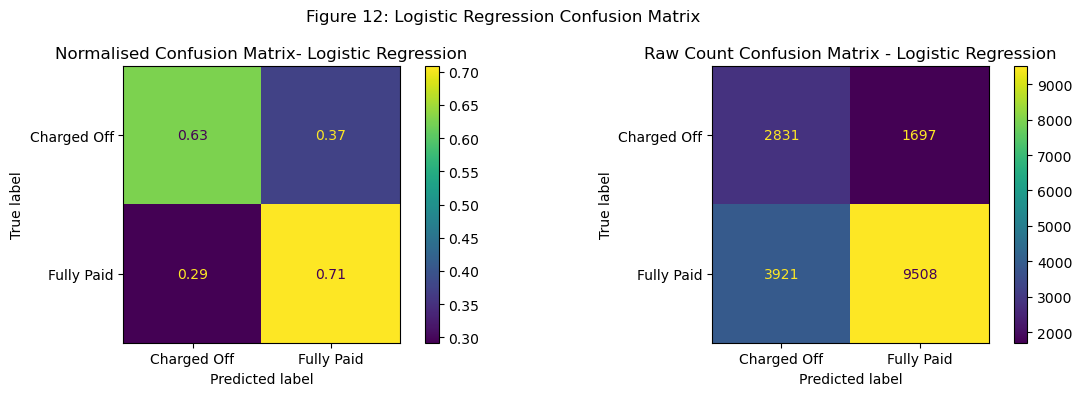

In [60]:
# logistic regression  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1, 2, figsize = (12,4))

#normalised confusion matrix 
logistic_cm_normalised = confusion_matrix(y_val, y_lr_pred, normalize = 'true') 
logistic_cm_display_normalised = ConfusionMatrixDisplay(confusion_matrix=logistic_cm_normalised , display_labels = ['Charged Off', 'Fully Paid'])
logistic_cm_display_normalised.plot(ax=axes[0], values_format='.2f')
axes[0].set_title('Normalised Confusion Matrix- Logistic Regression')

# raw count confusion matrix 
logistic_cm = confusion_matrix(y_val, y_lr_pred)
logistic_cm_display = ConfusionMatrixDisplay(confusion_matrix=logistic_cm, display_labels = ['Charged Off', 'Fully Paid'])
logistic_cm_display.plot(ax=axes[1])
axes[1].set_title('Raw Count Confusion Matrix - Logistic Regression')

fig.suptitle('Figure 12: Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.show()

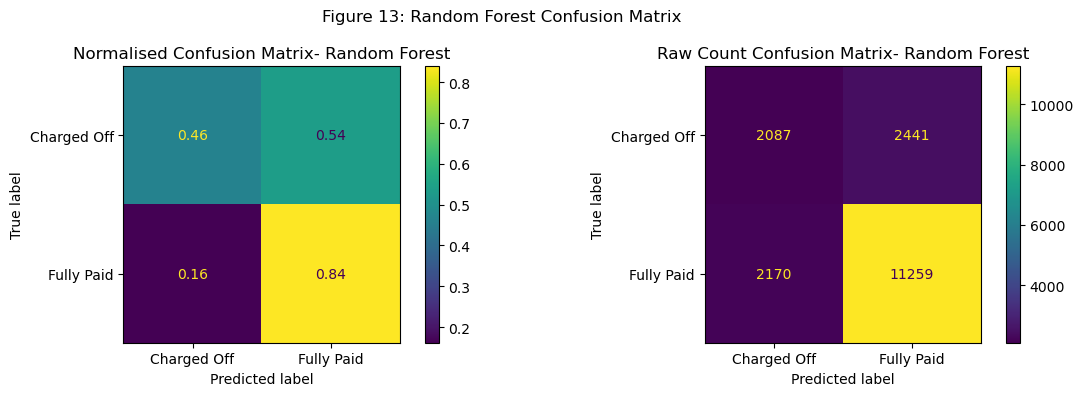

In [61]:
# random forest  
fig, axes = plt.subplots(1, 2, figsize = (12,4))

#normalised confusion matrix
forest_cm_normalised = confusion_matrix(y_val, y_rf_pred, normalize = 'true') 
forest_cm_display_normalised = ConfusionMatrixDisplay(confusion_matrix=forest_cm_normalised , display_labels = ['Charged Off', 'Fully Paid'])
forest_cm_display_normalised.plot(ax=axes[0], values_format='.2f')
axes[0].set_title('Normalised Confusion Matrix- Random Forest')

# raw count confusion matrix 
forest_cm = confusion_matrix(y_val, y_rf_pred)
forest_cm_display = ConfusionMatrixDisplay(confusion_matrix=forest_cm , display_labels = ['Charged Off', 'Fully Paid'])
forest_cm_display.plot(ax=axes[1])
axes[1].set_title('Raw Count Confusion Matrix- Random Forest')

fig.suptitle('Figure 13: Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

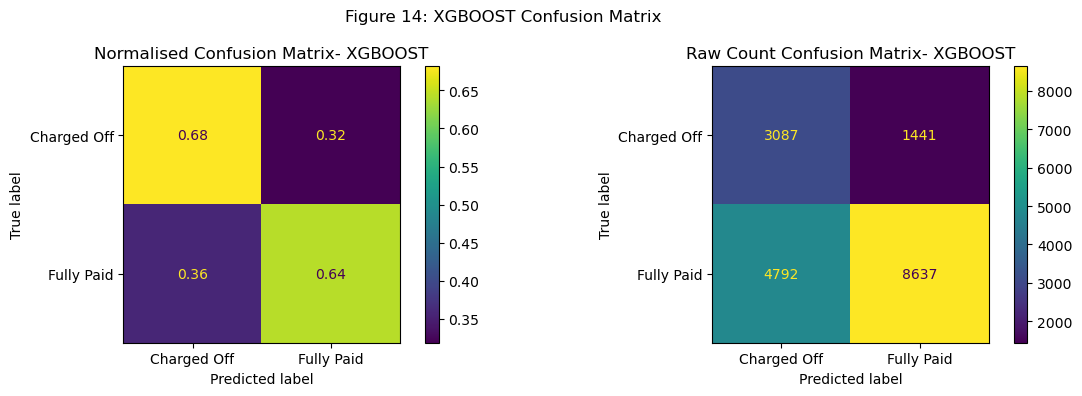

In [62]:
# XGBOOST
fig, axes = plt.subplots(1, 2, figsize = (12,4))

#normalised confusion matrix
xgboost_cm_normalised = confusion_matrix(y_val, y_xgb_pred, normalize = 'true') 
xgboost_cm_display_normalised = ConfusionMatrixDisplay(confusion_matrix=xgboost_cm_normalised , display_labels = ['Charged Off', 'Fully Paid'])
xgboost_cm_display_normalised.plot(ax=axes[0], values_format='.2f')
axes[0].set_title('Normalised Confusion Matrix- XGBOOST')

#raw count confusion matrix 
xgboost_cm = confusion_matrix(y_val, y_xgb_pred)
xgboost_cm_display = ConfusionMatrixDisplay(confusion_matrix=xgboost_cm , display_labels = ['Charged Off', 'Fully Paid'])
xgboost_cm_display.plot(ax=axes[1])
axes[1].set_title('Raw Count Confusion Matrix- XGBOOST')

fig.suptitle('Figure 14: XGBOOST Confusion Matrix')
plt.tight_layout()
plt.show()

## ROC-AUC 

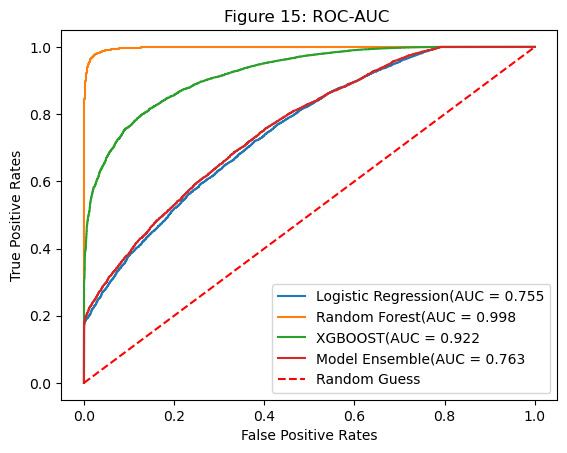

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_LR = best_tuner_lr.predict_proba(x_val)[:, 1] # probability that each loan is fully paid (1)
y_prob_RF = best_tuner_rf.predict_proba(x_val)[:, 1]
y_prob_XGB = best_tuner_xgb.predict_proba(x_val)[:, 1]
y_prob_model_ens = model_ensemble.predict_proba(x_val)[:, 1]

fpr_LR, tpr_LR, _ = roc_curve(y_val, y_prob_LR) #calculates false- and true positive rates at different thresholds, this is specificity 
#and sensitivity respectively
fpr_RF, tpr_RF, _ = roc_curve(y_val, y_prob_RF)
fpr_XGB, tpr_XGB, _ = roc_curve(y_val, y_prob_XGB)
fpr_model_ens, tpr_model_ens, _ = roc_curve(y_val, y_prob_model_ens)

auc_LR = roc_auc_score(y_val, y_prob_LR) #roc_auc_score computes the auc score without having to manually put in points 
auc_RF = roc_auc_score(y_val, y_prob_RF)
auc_XGB = roc_auc_score(y_val, y_prob_XGB)
auc_model_ens = roc_auc_score(y_val, y_prob_model_ens)

#plotting the curve 
plt.plot(fpr_LR, tpr_LR, label= f'Logistic Regression(AUC = {auc_LR:.3f}')
plt.plot(fpr_RF, tpr_RF, label= f'Random Forest(AUC = {auc_RF:.3f}')
plt.plot(fpr_XGB, tpr_XGB, label= f'XGBOOST(AUC = {auc_XGB:.3f}')
plt.plot(fpr_model_ens, tpr_model_ens, label = f'Model Ensemble(AUC = {auc_model_ens:.3f}')

plt.plot([0, 1], [0, 1], 'r--', label = 'Random Guess') #baseline to show random guessing/classifying 

plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('Figure 15: ROC-AUC ')
plt.legend()
plt.show()

In [68]:
# adding model_ensemble to test_predictions_DF
lr_test_prob = final_lr.predict_proba(encoded_test_dataset)[:,1]
rf_test_prob = final_rf.predict_proba(encoded_test_dataset)[:,1]
xgb_test_prob = final_xgb.predict_proba(encoded_test_dataset)[:,1]

model_ens_prob = (lr_test_prob + rf_test_prob + xgb_test_prob) / 3
model_ensemble_pred = (model_ens_prob >= 0.5).astype(int) #converting to binary format 
test_predictions_df['Model Ensemble'] = model_ensemble_pred
test_predictions_df.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Logistic Regression,Random Forest Classification,XGBoost,Model Ensemble
0,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,-1.0,9.0,0.0,621908.0,1058970.0,0.0,0.0,1,1,1,1
1,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,-1.0,11.0,0.0,679573.0,904442.0,0.0,0.0,1,1,1,1
2,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,1,1,1,1
3,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,0,0,0,0
4,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,1,1,1,1


## Precision-Recall Curve 

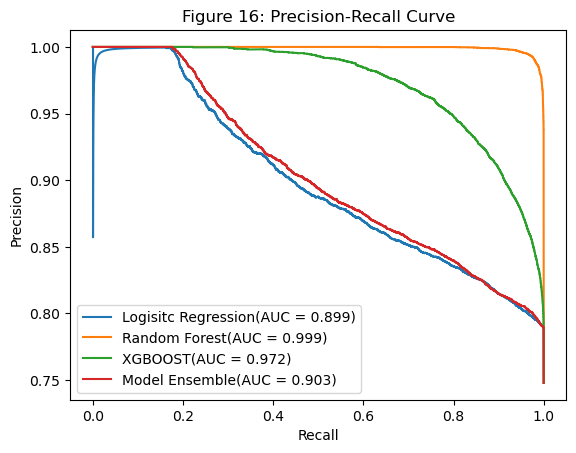

In [70]:
# used when one class is more dominant than the other
# x-axis = recall y-axis = precision 
# only looks at the positive class which in this case is 1= fully paid 
from sklearn.metrics import precision_recall_curve, average_precision_score

prec_LR, recall_LR, thresholds = precision_recall_curve(y_val, y_prob_LR)
prec_RF, recall_RF, thresholds = precision_recall_curve(y_val, y_prob_RF)
prec_XGB, recall_XGB, thresholds = precision_recall_curve(y_val, y_prob_XGB)
prec_model_ens, recall_model_ens, thresholds = precision_recall_curve(y_val, y_prob_model_ens)

# similar methodolgy to area-under-curve this time for precision-recall curve-> area under precision-recall curve 
avp_LR = average_precision_score(y_val,y_prob_LR) 
avp_RF = average_precision_score(y_val,y_prob_RF) 
avp_XGB = average_precision_score(y_val,y_prob_XGB) 
avp_model_ens = average_precision_score(y_val,y_prob_model_ens)

#plot 
plt.plot(recall_LR, prec_LR, label= f'Logisitc Regression(AUC = {avp_LR:.3f})')
plt.plot(recall_RF, prec_RF, label= f'Random Forest(AUC = {avp_RF:.3f})')
plt.plot(recall_XGB, prec_XGB, label= f'XGBOOST(AUC = {avp_XGB:.3f})')
#plt.plot(recall_SVC, prec_SVC, labels = f'SVC(AUC = {avp_SVC:.3f})')
plt.plot(recall_model_ens, prec_model_ens, label= f'Model Ensemble(AUC = {avp_model_ens:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Figure 16: Precision-Recall Curve')
plt.legend()
plt.show()

The above precision-recall curve shows the precision and recall across a range of thresholds like the AUC-ROC. Random Forest has the highest AUC here indicating that this model perfroms the best in balancing precision and recall, all values of the models are shown to be above 0.9 which suggests all the models perform well and identifying the positive class, which in this case is the Fully paid loans. However, from earlier evaluation methods we already know that the model can effectively predict the Fully Paid class. 

~ we've done fully paid as the positive class here, our target class i could show the roc-auc and precision curve flipped so it focuses on charged off instead for comparison 

## Flipped ROC-AUC 

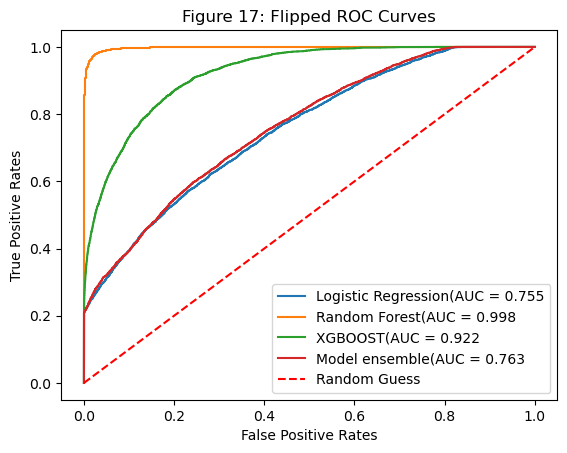

In [71]:
y_val_flipped = 1 - y_val

y_probs_flipped_LR = 1 - y_prob_LR
y_probs_flipped_RF = 1 - y_prob_RF
y_probs_flipped_XGB = 1 - y_prob_XGB
y_probs_flipped_model_ens = 1 - y_prob_model_ens

fpr_flipped_LR, tpr_flipped_LR, _ = roc_curve(y_val_flipped, y_probs_flipped_LR)
fpr_flipped_RF, tpr_flipped_RF, _ = roc_curve(y_val_flipped, y_probs_flipped_RF)
fpr_flipped_XGB, tpr_flipped_XGB, _ = roc_curve(y_val_flipped, y_probs_flipped_XGB)
fpr_flipped_model_ens, tpr_flipped_model_ens, _ = roc_curve(y_val_flipped, y_probs_flipped_model_ens)

auc_flipped_LR = roc_auc_score(y_val_flipped, y_probs_flipped_LR)
auc_flipped_RF = roc_auc_score(y_val_flipped, y_probs_flipped_RF)
auc_flipped_XGB = roc_auc_score(y_val_flipped, y_probs_flipped_XGB)
auc_flipped_model_ens = roc_auc_score(y_val_flipped, y_probs_flipped_model_ens)

plt.plot(fpr_flipped_LR, tpr_flipped_LR, label= f'Logistic Regression(AUC = {auc_flipped_LR:.3f}')
plt.plot(fpr_flipped_RF, tpr_flipped_RF, label= f'Random Forest(AUC = {auc_flipped_RF:.3f}')
plt.plot(fpr_flipped_XGB, tpr_flipped_XGB, label= f'XGBOOST(AUC = {auc_flipped_XGB:.3f}')
plt.plot(fpr_flipped_model_ens, tpr_flipped_model_ens, label= f'Model ensemble(AUC = {auc_flipped_model_ens:.3f}')

plt.plot([0, 1], [0, 1], 'r--', label = 'Random Guess')

plt.xlabel('False Positive Rates') 
plt.ylabel('True Positive Rates')
plt.title('Figure 17: Flipped ROC Curves')
plt.legend()
plt.show() 

## Flipped Precision-Recall Curve 

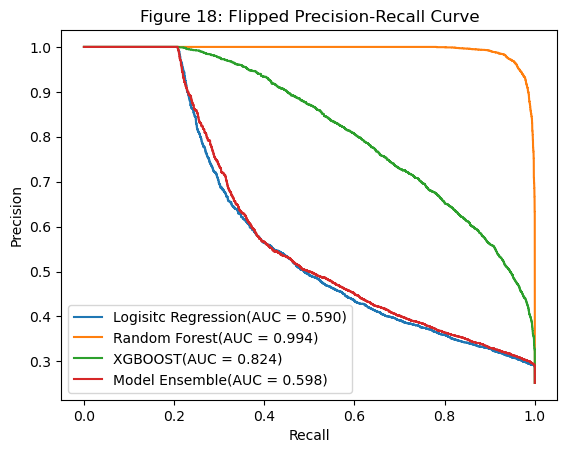

In [72]:
# flipped precision-recall curve, focusing on the minority class 
prec_flipped_LR, recall_flipped_LR, thresholds = precision_recall_curve(y_val_flipped, y_probs_flipped_LR)
prec_flipped_RF, recall_flipped_RF, thresholds = precision_recall_curve(y_val_flipped, y_probs_flipped_RF)
prec_flipped_XGB, recall_flipped_XGB, thresholds = precision_recall_curve(y_val_flipped, y_probs_flipped_XGB)
prec_flipped_model_ens, recall_flipped_model_ens, thresholds = precision_recall_curve(y_val_flipped, y_probs_flipped_model_ens)

avp_flipped_LR = average_precision_score(y_val_flipped,y_probs_flipped_LR) 
avp_flipped_RF = average_precision_score(y_val_flipped,y_probs_flipped_RF) 
avp_flipped_XGB = average_precision_score(y_val_flipped,y_probs_flipped_XGB)
avp_flipped_model_ens = average_precision_score(y_val_flipped,y_probs_flipped_model_ens)

plt.plot(recall_flipped_LR, prec_flipped_LR, label= f'Logisitc Regression(AUC = {avp_flipped_LR:.3f})')
plt.plot(recall_flipped_RF, prec_flipped_RF, label= f'Random Forest(AUC = {avp_flipped_RF:.3f})')
plt.plot(recall_flipped_XGB, prec_flipped_XGB, label= f'XGBOOST(AUC = {avp_flipped_XGB:.3f})')
#plt.plot(recall_flipped_SVC, prec_flipped_SVC, label= f'SVC(AUC = {avp_flipped_SVC:.3f})')
plt.plot(recall_flipped_model_ens, prec_flipped_model_ens, label= f'Model Ensemble(AUC = {avp_flipped_model_ens:.3f})')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Figure 18: Flipped Precision-Recall Curve')
plt.legend()
plt.show()

## Statistical Test- Mcnemar's Test

In [75]:
# stats test 
from statsmodels.stats.contingency_tables import mcnemar
# comparing LR vs RF
crosstab_lr_rf = pd.crosstab(test_predictions_df['Logistic Regression'], test_predictions_df['Random Forest Classification'], margins = False)
mcnemar_lr_rf = mcnemar(crosstab_lr_rf, exact = False)

print('McNemar Test for Logistic Regression and Random Forest', mcnemar_lr_rf)

# comparing LR vs XGBOOST
crosstab_lr_xgb = pd.crosstab(test_predictions_df['Logistic Regression'], test_predictions_df['XGBoost'], margins = False)
mcnemar_lr_xgb = mcnemar(crosstab_lr_xgb, exact = False)

print('McNemar Test for Logistic Regression and XGBOOST', mcnemar_lr_xgb)

# comparing RF vs XGBOOST
crosstab_rf_xgb = pd.crosstab(test_predictions_df['Random Forest Classification'], test_predictions_df['XGBoost'], margins = False)
mcnemar_rf_xgb = mcnemar(crosstab_rf_xgb, exact = False)

print('McNemar Test for Random Forest and XGBOOST', mcnemar_rf_xgb)

McNemar Test for Logistic Regression and Random Forest pvalue      0.0
statistic   1512.3758082921263
McNemar Test for Logistic Regression and XGBOOST pvalue      1.510344979222202e-24
statistic   104.57919366450685
McNemar Test for Random Forest and XGBOOST pvalue      0.0
statistic   2313.9300900900903
